# Simple oscillator

This example implements a simple harmonic oscillator
in a 2D neural population.
Here, instead of having the recurrent input just integrate
(i.e. feed the full input value back to the population),
we have two dimensions which interact.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
from nengo.processes import Piecewise
import nengo_loihi
nengo_loihi.set_defaults()

## Creating the network in Nengo

Our model consists of one recurrently connected ensemble.
The ensemble will naturally oscillate,
but in order to begin the oscillation
we make an input node to give it an initial kick.

In [2]:
speed = 1.5  # Slower oscillations may decay to 0

with nengo.Network(label='Oscillator') as model:
    ens = nengo.Ensemble(200, dimensions=2)
    kick = nengo.Node(Piecewise({0: [1, 0], 0.1: [0, 0]}))

    nengo.Connection(kick, ens)
    nengo.Connection(ens, ens,
                     transform=[[1.0, speed], [-speed, 1.0]],
                     synapse=0.1)

    kick_probe = nengo.Probe(kick)
    ens_probe = nengo.Probe(ens, synapse=0.1)

## Running the network in Nengo

We can use Nengo to see the desired model output.

In [3]:
with nengo.Simulator(model) as sim:
    sim.run(3)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

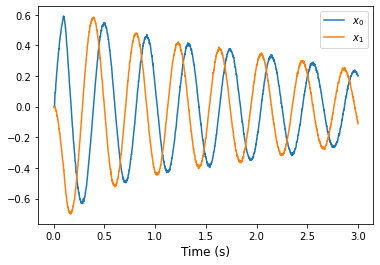

In [4]:
def plot_over_time(t, data):
    plt.figure()
    plt.plot(t, data[ens_probe])
    plt.xlabel('Time (s)', fontsize='large')
    plt.legend(['$x_0$', '$x_1$'])


plot_over_time(t, sim.data)

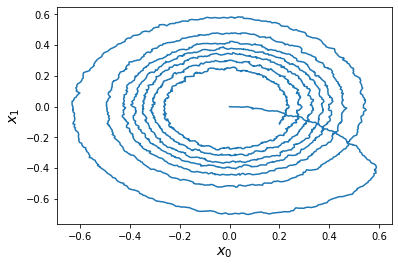

In [5]:
def plot_xy(data):
    plt.figure()
    plt.plot(data[ens_probe][:, 0], data[ens_probe][:, 1])
    plt.xlabel('$x_0$', fontsize='x-large')
    plt.ylabel('$x_1$', fontsize='x-large')


plot_xy(sim.data)

## Running the network with Nengo Loihi

In [6]:
with nengo_loihi.Simulator(model, precompute=True) as sim:
    sim.run(3)
t = sim.trange()

/home/travis/build/nengo/nengo-loihi/nengo_loihi/builder/discretize.py:477: UserWarning: Lost 1 extra bits in weight rounding
  warnings.warn("Lost %d extra bits in weight rounding" % (-s2,))


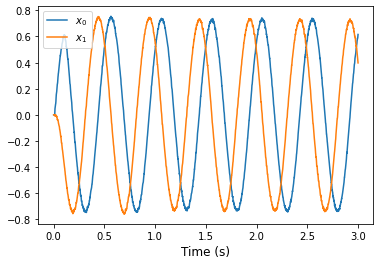

In [7]:
plot_over_time(t, sim.data)

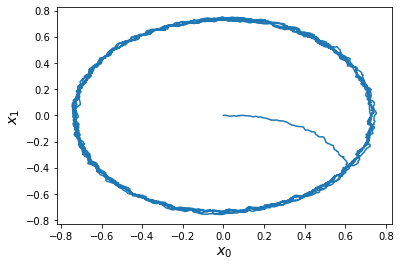

In [8]:
plot_xy(sim.data)